In [3]:
import pandas as pd
import numpy as np
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt

In [4]:
path = './2022-06-16T17-06-18/'
test = './2022-06-16T17-07-10/'

## Interpolate poses and frames for COLMAP model aligner

In [3]:
df = pd.read_csv(path + 'ARposes.txt', sep = ",",header=None)
df.columns = ['time', 'POS_X', 'POS_Y', 'POS_Z', 'Q_W', 'Q_X', 'Q_Y', 'Q_Z']
df.head()

,time,POS_X,POS_Y,POS_Z,Q_W,Q_X,Q_Y,Q_Z
0,1.655396e+09,0.000051,-0.000470,-0.000249,0.997333,-0.072928,0.000785,-0.002853
1,1.655396e+09,0.000045,-0.000479,-0.000235,0.997343,-0.072794,0.000736,-0.002847
2,1.655396e+09,0.000041,-0.000450,-0.000220,0.997345,-0.072760,0.000764,-0.002872
3,1.655396e+09,0.000034,-0.000444,-0.000247,0.997325,-0.073028,0.000744,-0.002850
4,1.655396e+09,0.000029,-0.000442,-0.000273,0.997306,-0.073288,0.000731,-0.002862


In [8]:
test_df = pd.read_csv(test + 'ARposes.txt', sep = ",",header=None)
test_df.columns = ['time', 'POS_X', 'POS_Y', 'POS_Z', 'Q_W', 'Q_X', 'Q_Y', 'Q_Z']
frames_df = pd.read_csv(test + 'Frames.txt', sep = ",",header=None)
frames_df.columns = ['time','frameNumber','focalLenghtX','focalLenghtY','principalPointX','principalPointY']

<AxesSubplot:>

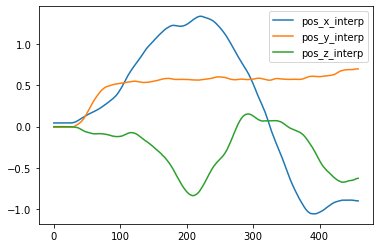

In [9]:
frames_df["pos_x_interp"] = np.interp(frames_df["time"], test_df["time"], test_df["POS_X"])
frames_df["pos_y_interp"] = np.interp(frames_df["time"], test_df["time"], test_df["POS_Y"])
frames_df["pos_z_interp"] = np.interp(frames_df["time"], test_df["time"], test_df["POS_Z"])
frames_df[["pos_x_interp", "pos_y_interp", "pos_z_interp"]].plot()

In [11]:
frames_df[frames_df.frameNumber.isin([0, 200, 400])]

,time,frameNumber,focalLenghtX,focalLenghtY,principalPointX,principalPointY,pos_x_interp,pos_y_interp,pos_z_interp
0,1.655396e+09,0,1606.102417,1606.102417,952.858826,681.516602,0.043914,-0.006917,-0.001010
200,1.655396e+09,200,1582.933350,1582.933350,954.109863,682.367371,1.237320,0.570658,-0.788729
400,1.655396e+09,400,1579.802368,1579.802368,954.242859,682.333069,-1.036789,0.605029,-0.413223


<AxesSubplot:>

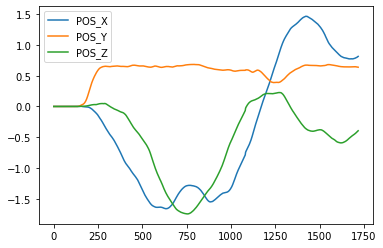

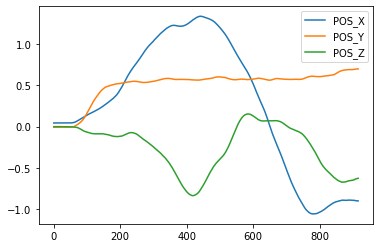

In [6]:
df[["POS_X", 'POS_Y', 'POS_Z']].plot()
test_df[["POS_X", 'POS_Y', 'POS_Z']].plot()

In [7]:
frames_df = pd.read_csv(path + 'Frames.txt', sep = ",",header=None)
frames_df.columns = ['time','frameNumber','focalLenghtX','focalLenghtY','principalPointX','principalPointY']
frames_df.head()

,time,frameNumber,focalLenghtX,focalLenghtY,principalPointX,principalPointY
0,1.655396e+09,0,1597.961914,1597.961914,952.659119,682.060913
1,1.655396e+09,1,1597.961914,1597.961914,952.641968,682.077271
2,1.655396e+09,2,1597.961914,1597.961914,952.585266,682.240295
3,1.655396e+09,3,1597.961914,1597.961914,952.630920,682.117310
4,1.655396e+09,4,1597.961914,1597.961914,952.690735,682.143982


In [12]:
frames_df["pos_x_interp"] = np.interp(frames_df["time"], df["time"], df["POS_X"])
frames_df["pos_y_interp"] = np.interp(frames_df["time"], df["time"], df["POS_Y"])
frames_df["pos_z_interp"] = np.interp(frames_df["time"], df["time"], df["POS_Z"])

<AxesSubplot:>

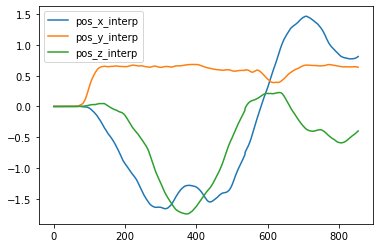

In [13]:
frames_df[["pos_x_interp", "pos_y_interp", "pos_z_interp"]].plot()

In [14]:
frames_df[frames_df.frameNumber.isin([0, 300, 600])]

,time,frameNumber,focalLenghtX,focalLenghtY,principalPointX,principalPointY,pos_x_interp,pos_y_interp,pos_z_interp
0,1.655396e+09,0,1597.961914,1597.961914,952.659119,682.060913,0.000051,-0.000470,-0.000249
300,1.655396e+09,300,1577.923706,1577.923706,953.211792,683.977051,-1.638658,0.635066,-1.242551
600,1.655396e+09,600,1579.176147,1579.176147,951.874756,685.013367,0.304727,0.445891,0.210545


In [ ]:
%matplotlib ipympl
plt.figure()
step = 100
ax = plt.axes(projection= '3d')
ax.plot3D(-df["POS_X"], df["POS_Z"], df["POS_Y"], label = "Original ground truth train poses", color = 'Green')
ax.plot3D(-test_df["POS_X"], test_df["POS_Z"], test_df["POS_Y"], label = "Original ground truth train poses", color = 'Red')
# ax.set_zlim([-2, -5])
ax.set_xlabel("x (m)")
ax.set_ylabel("z (m)")
ax.set_zlabel("y (m)")
ax.legend()
plt.show()

In [ ]:
def quat_to_euler(row):
    r = R.from_quat([row["Q_X"], row["Q_Y"], row["Q_Z"], row["Q_W"]])
    return r.as_euler('ZYX', degrees=True)
euler = df.apply(lambda row : quat_to_euler(row), axis = 1)
df_euler = pd.DataFrame(euler.to_list(), columns=['azimuth','pitch', 'roll'])
df_euler.plot()

In [ ]:
orientation = pd.read_csv(path + 'Motion.txt', sep = ",",header=None)
orientation.columns = ['time','imu_Q_W', 'imu_Q_X', 'imu_Q_Y', 'imu_Q_Z']
orientation.head()

In [ ]:
def quat_to_euler(row):
    r = R.from_quat([row["imu_Q_X"], row["imu_Q_Y"], row["imu_Q_Z"], row["imu_Q_W"]])
    return r.as_euler('ZYX', degrees=True)
euler = orientation.apply(lambda row : quat_to_euler(row), axis = 1)
df_euler = pd.DataFrame(euler.to_list(), columns=['azimuth','pitch', 'roll'])
df_euler.plot()

In [ ]:
accel = pd.read_csv(path + 'MotARH.txt', sep = ",",header=None)
accel.columns = ['time','ang_vel_x','ang_vel_y','ang_vel_z',
                 'gravity_x','gravity_y','gravity_z',
                 'imu_acc_x','imu_acc_y','imu_acc_z', 'motionHeading']
accel.head()

In [ ]:
accel[['imu_acc_x', 'imu_acc_y', 'imu_acc_z']].plot()
accel[['ang_vel_x','ang_vel_y','ang_vel_z']].plot()

In [ ]:
accel["seconds"] = accel["time"] - accel["time"][0]
accel.head()

In [ ]:
from scipy import integrate
from scipy import signal
plt.figure()
t = accel["seconds"]
vel_x = integrate.cumtrapz(accel["imu_acc_x"], t, initial=0)
vel_y = integrate.cumtrapz(accel["imu_acc_y"], t, initial=0)
vel_z = integrate.cumtrapz(accel["imu_acc_z"], t, initial=0) 
plt.plot(vel_x, label = "vel_x")
plt.plot(vel_y, label = "vel_y")
plt.plot(vel_z, label = "vel_z")
# vel_x = signal.detrend(vel_x)
# vel_y = signal.detrend(vel_y)
# vel_z = signal.detrend(vel_z)
pos_x = integrate.cumtrapz(vel_x, t, initial=0)
pos_y = integrate.cumtrapz(vel_y, t, initial=0)
pos_z = integrate.cumtrapz(vel_z, t, initial=0)
plt.legend()
plt.figure() 
# pos_x = signal.detrend(pos_x)
# pos_y = signal.detrend(pos_y)
# pos_z = signal.detrend(pos_z)
plt.plot(t,pos_x, label = 'pos_x')
plt.plot(t,pos_y, label = 'pos_y')
plt.plot(t,pos_z, label = 'pos_z')
plt.legend()

In [ ]:
combined = pd.concat([df, 
                      accel[["imu_acc_x", "imu_acc_y", "imu_acc_z"]]],
                      axis= 1)
combined["seconds"] = combined["time"] - combined["time"][0]
combined["timestep"] = combined["time"] - combined["time"].shift(1)
combined.head()

In [ ]:
accel["seconds"] = accel["time"] - accel["time"][0]
accel["timestep"] = accel["time"] - accel["time"].shift(1)
accel["lin_vel_x"] = integrate.cumtrapz(accel["imu_acc_x"], accel["time"], initial=0)
accel["lin_vel_y"] = integrate.cumtrapz(accel["imu_acc_y"], accel["time"], initial=0)
accel["lin_vel_z"] = integrate.cumtrapz(accel["imu_acc_z"], accel["time"], initial=0)
accel["prev_lin_vel_x"] = accel["lin_vel_x"].shift(1)
accel["prev_lin_vel_y"] = accel["lin_vel_y"].shift(1)
accel["prev_lin_vel_z"] = accel["lin_vel_z"].shift(1)
accel["prev_imu_acc_x"] = accel["imu_acc_x"].shift(1)
accel["prev_imu_acc_y"] = accel["imu_acc_y"].shift(1)
accel["prev_imu_acc_z"] = accel["imu_acc_z"].shift(1)

In [ ]:
image_frame_step = 100

In [ ]:
results = []
accel_idx = 1
for i in range(image_frame_step, len(df), image_frame_step):
    row = df.iloc[i,:]
    time = row.time
    x, y, z = row.POS_X, row.POS_Y, row.POS_Z
    print(f'prev {x,y,z}')
    time_taken = 0
    while accel.iloc[accel_idx,0] < time:
        accel_row = accel.iloc[accel_idx,:]
        x += accel_row.prev_lin_vel_x * accel_row.timestep + 1/2 * accel_row.prev_imu_acc_x * accel_row.timestep ** 2 
        y += accel_row.prev_lin_vel_y * accel_row.timestep + 1/2 * accel_row.prev_imu_acc_y * accel_row.timestep ** 2 
        z += accel_row.prev_lin_vel_z * accel_row.timestep + 1/2 * accel_row.prev_imu_acc_z * accel_row.timestep ** 2
        accel_idx += 1
        time_taken += accel_row.timestep
    print(f'imu added {x,y,z}, time taken {time_taken}')
    results.append([x, y, z])

imu_trans = pd.DataFrame(results, columns=["imu_POS_X", "imu_POS_Y","imu_POS_Z"])

In [ ]:
imu_trans.plot()
df[["POS_X", 'POS_Y', 'POS_Z']].plot()

In [ ]:
accel['prev_ang_vel_x'] = accel['ang_vel_x'].shift(1) 
accel['prev_ang_vel_y'] = accel['ang_vel_y'].shift(1)
accel['prev_ang_vel_z'] = accel['ang_vel_z'].shift(1)

In [ ]:
from ahrs.filters import AngularRate
import rowan
results = []
accel_idx = 1
for i in range(image_frame_step, len(df), image_frame_step):
    row = df.iloc[i,:]
    time = row.time
    qw = row.Q_W
    qx = row.Q_X
    qy = row.Q_Y
    qz = row.Q_Z
    q_prev = np.array([qw, qx, qy, qz])
    print(f'prev {q_prev}')
    cur_q = q_prev
    angular_rate = AngularRate()
    while accel.iloc[accel_idx,0] < time:
        accel_row = accel.iloc[accel_idx,:]
        cur_q = angular_rate.update(cur_q, 
                                    np.hstack([accel_row["prev_ang_vel_x"],accel_row["prev_ang_vel_y"], accel_row["prev_ang_vel_z"]]),
                                    'closed', 
                                    1,
                                    accel_row['timestep'])
        cur_q = rowan.normalize(cur_q)
        accel_idx += 1
        time_taken += accel_row.timestep
    print(f'imu added {cur_q}, time taken {time_taken}')
    results.append(cur_q)

imu_q_ahrs = pd.DataFrame(results, columns=["imu_Q_W", "imu_Q_X", "imu_Q_Y", "imu_Q_Z"])

In [ ]:
df[['Q_W' , 'Q_X', 'Q_Y', 'Q_Z']].plot()
imu_q_ahrs[["imu_Q_W", "imu_Q_X", "imu_Q_Y", "imu_Q_Z"]].plot()